In [3]:
!pip install openai-whisper
!pip install torch
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import whisper
import os
from tqdm import tqdm


In [2]:
model = whisper.load_model("medium")  # You can use "small", "medium", or "large" for better quality


In [4]:
import zipfile

# Option 1: Using double backslashes
zip_path = "C:\\Users\\rifat\\Downloads\\archive (1).zip"

# Option 2: Or using a raw string (recommended)
# zip_path = r"C:\Users\rifat\Downloads\archive (1).zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("medical_dataset")  # This will create the folder and extract everything


In [7]:
train_path = train_path = os.path.join(
    "medical_dataset",
    "medical speech transcription and intent",
    "Medical Speech, Transcription, and Intent",
    "recordings",
    "train"
)

if os.path.exists(train_path):
    print("\nAudio files in 'train' folder (first 10 shown):")
    for file in os.listdir(train_path)[:10]:
        print("-", file)
else:
    print("\n'train' folder not found!")



Audio files in 'train' folder (first 10 shown):
- 1249120_44142156_100535941.wav
- 1249120_44142156_102100267.wav
- 1249120_44142156_102691000.wav
- 1249120_44142156_103207247.wav
- 1249120_44142156_104815781.wav
- 1249120_44142156_106992412.wav
- 1249120_44142156_107416693.wav
- 1249120_44142156_108551604.wav
- 1249120_44142156_108918007.wav
- 1249120_44142156_109272216.wav


In [4]:
!pip install tqdm pandas
import whisper
import os
import pandas as pd
from tqdm import tqdm


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
transcriptions = []

# Loop through all WAV files
for filename in tqdm(os.listdir(train_path)):
    if filename.endswith(".wav"):
        audio_path = os.path.join(train_path, filename)
        try:
            result = model.transcribe(audio_path)
            transcriptions.append({
                "filename": filename,
                "transcription": result["text"]
            })
        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

In [ ]:
# Save to CSV for later processing
df = pd.DataFrame(transcriptions)
df.to_csv("train_transcriptions.csv", index=False)

print("All transcriptions saved to train_transcriptions.csv")

In [7]:
import pandas as pd
df = pd.read_csv("train_transcriptions.csv")
df.head(10)

,filename,transcription
0,1249120_44142156_100535941.wav,I have some terrible problems when I am breat...
1,1249120_44142156_102100267.wav,I feel really sad all the time.
2,1249120_44142156_102691000.wav,మిన్లి విక and మికల పదిసికాలు ధితితరినిలు మార...
3,1249120_44142156_103207247.wav,Is my cut infected or just healing?
4,1249120_44142156_104815781.wav,What's the symptoms of appendicitis?
5,1249120_44142156_106992412.wav,I have pain in my chest that saddens me.
6,1249120_44142156_107416693.wav,My heart feels like it's going to explode.
7,1249120_44142156_108551604.wav,Something dark is there on my arm.
8,1249120_44142156_108918007.wav,"After a break up, I feel something strange in..."
9,1249120_44142156_109272216.wav,"I think I sprained my ankle, it really hurts"


In [14]:
!pip install scikit-learn pandas



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [9]:
df = pd.read_csv("train_transcriptions.csv")  #current CSV

texts = df["transcription"].fillna("").tolist()

In [14]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Get feature (word) names
feature_names = vectorizer.get_feature_names_out()


In [15]:
def extract_top_keywords(tfidf_vector, top_n=5):
    sorted_indices = np.argsort(tfidf_vector.data)[::-1][:top_n]
    top_words = [feature_names[tfidf_vector.indices[i]] for i in sorted_indices]
    return top_words

# Apply keyword extraction to each row
keywords = []
for i in range(X.shape[0]):
    tfidf_vector = X[i]
    top_keywords = extract_top_keywords(tfidf_vector)
    keywords.append(top_keywords)

# Add to DataFrame
df["keywords"] = keywords


In [16]:
df.to_csv("train_transcriptions_with_tfidf_keywords.csv", index=False)
print("Keywords extracted using TF-IDF and saved.")

Keywords extracted using TF-IDF and saved.


In [18]:
new_df = df[["filename", "transcription", "keywords"]]
new_df

,filename,transcription,keywords
0,1249120_44142156_100535941.wav,I have some terrible problems when I am breat...,"[breathing, night, terrible, problems]"
1,1249120_44142156_102100267.wav,I feel really sad all the time.,"[sad, really, time, feel]"
2,1249120_44142156_102691000.wav,మిన్లి విక and మికల పదిసికాలు ధితితరినిలు మార...,"[లక, రక, తరన, నల, తర]"
3,1249120_44142156_103207247.wav,Is my cut infected or just healing?,"[healing, cut, infected, just]"
4,1249120_44142156_104815781.wav,What's the symptoms of appendicitis?,"[appendicitis, symptoms]"
...,...,...,...
376,1249120_44246595_72597543.wav,I feel pain in my neck.,"[neck, feel, pain]"
377,1249120_44246595_72677345.wav,I have a pain in my trapeze.,"[trapeze, pain]"
378,1249120_44246595_72846473.wav,My chest hurts when I smoke.,"[smoke, chest, hurts]"
379,1249120_44246595_73273010.wav,I fell through a window while I was cleaning ...,"[pretty, glass, shard, cleaning, window]"


In [19]:
new_df.to_csv("filtered_transcriptions_with_keywords.csv", index=False)
print("✅ Saved to filtered_transcriptions_with_keywords.csv")


✅ Saved to filtered_transcriptions_with_keywords.csv


In [20]:
new_df

,filename,transcription,keywords
0,1249120_44142156_100535941.wav,I have some terrible problems when I am breat...,"[breathing, night, terrible, problems]"
1,1249120_44142156_102100267.wav,I feel really sad all the time.,"[sad, really, time, feel]"
2,1249120_44142156_102691000.wav,మిన్లి విక and మికల పదిసికాలు ధితితరినిలు మార...,"[లక, రక, తరన, నల, తర]"
3,1249120_44142156_103207247.wav,Is my cut infected or just healing?,"[healing, cut, infected, just]"
4,1249120_44142156_104815781.wav,What's the symptoms of appendicitis?,"[appendicitis, symptoms]"
...,...,...,...
376,1249120_44246595_72597543.wav,I feel pain in my neck.,"[neck, feel, pain]"
377,1249120_44246595_72677345.wav,I have a pain in my trapeze.,"[trapeze, pain]"
378,1249120_44246595_72846473.wav,My chest hurts when I smoke.,"[smoke, chest, hurts]"
379,1249120_44246595_73273010.wav,I fell through a window while I was cleaning ...,"[pretty, glass, shard, cleaning, window]"


In [21]:
new_df['keywords'].value_counts()

keywords
[]                                            6
[hearing, having, hard, time]                 2
[triggering, tell, doing, sharp, chest]       2
[temperature, house, high, body, cold]        2
[football, play, muscle, pain]                2
                                             ..
[doctor, darkness, reason, blurry, vision]    1
[hospital, arrived, accident, wound, open]    1
[difficulty, swelling, redness, walking]      1
[know, don, cold, feel]                       1
[showers, using, foot, gym, cut]              1
Name: count, Length: 328, dtype: int64

In [22]:
from collections import Counter
import ast

# If keywords are strings (e.g., "['pain', 'chest']"), convert them back to lists
new_df["keywords"] = new_df["keywords"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten all keywords into one list
all_keywords = [keyword for row in new_df["keywords"] for keyword in row]

# Count frequency of each keyword
keyword_counts = Counter(all_keywords)


In [23]:
top_keywords = keyword_counts.most_common(20)

print("🔝 Top 20 Most Frequent Keywords:")
for word, count in top_keywords:
    print(f"{word}: {count}")


🔝 Top 20 Most Frequent Keywords:
pain: 65
feel: 37
hurts: 22
like: 18
heart: 16
shoulder: 16
hair: 14
time: 13
cold: 13
left: 13
chest: 12
neck: 12
head: 11
stomach: 11
body: 11
knee: 11
hard: 11
feels: 10
sensation: 10
muscle: 10


In [27]:

keyword_freq_df = pd.DataFrame(top_keywords, columns=["top_keyword", "count"])
keyword_freq_df.head()


,top_keyword,count
0,pain,65
1,feel,37
2,hurts,22
3,like,18
4,heart,16


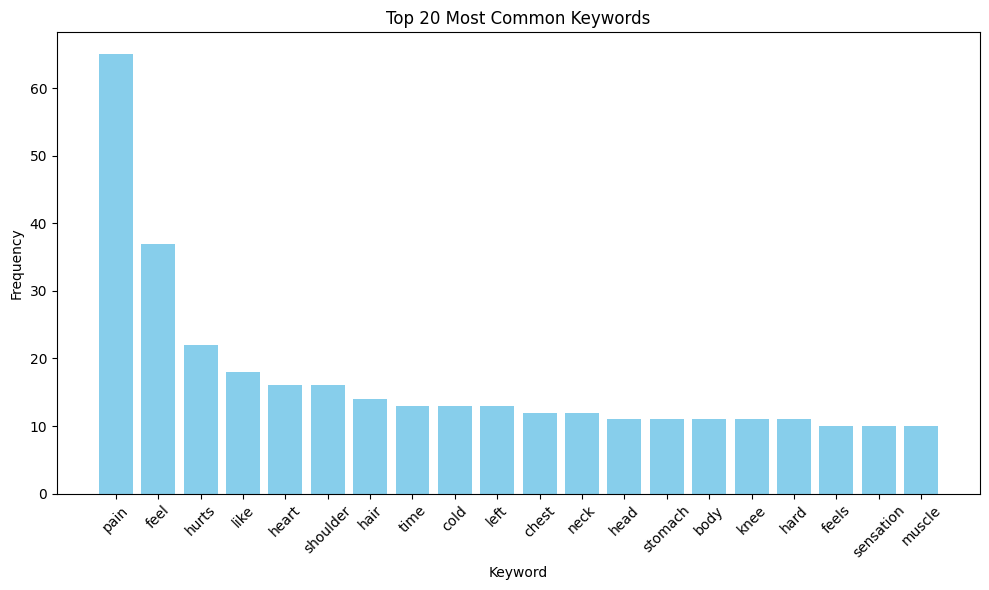

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(keyword_freq_df["top_keyword"], keyword_freq_df["count"], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Keywords")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [29]:

# Load overview CSV (contains category labels)
overview_path = "medical_dataset/medical speech transcription and intent/Medical Speech, Transcription, and Intent/overview-of-recordings.csv"
overview_df = pd.read_csv(overview_path)

# Check its structure
print(overview_df.columns)
overview_df.head()


Index(['audio_clipping', 'audio_clipping:confidence',
       'background_noise_audible', 'background_noise_audible:confidence',
       'overall_quality_of_the_audio', 'quiet_speaker',
       'quiet_speaker:confidence', 'speaker_id', 'file_download', 'file_name',
       'phrase', 'prompt', 'writer_id'],
      dtype='object')


,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [30]:

overview_path = "medical_dataset/medical speech transcription and intent/Medical Speech, Transcription, and Intent/overview-of-recordings.csv"
overview_df = pd.read_csv(overview_path)

# Just use needed columns
overview_df = overview_df[["file_name", "prompt"]]  # prompt = disease/intent

# Rename for consistency
overview_df.rename(columns={"file_name": "filename", "prompt": "disease"}, inplace=True)


In [31]:
# Merge datasets on filename
merged_df = pd.merge(new_df, overview_df, on="filename")

# Remove rows with missing data
merged_df.dropna(subset=["keywords", "disease"], inplace=True)

print(merged_df.head())


                         filename  \
0  1249120_44142156_100535941.wav   
1  1249120_44142156_102100267.wav   
2  1249120_44142156_102691000.wav   
3  1249120_44142156_103207247.wav   
4  1249120_44142156_104815781.wav   

                                       transcription  \
0   I have some terrible problems when I am breat...   
1                    I feel really sad all the time.   
2   మిన్లి విక and మికల పదిసికాలు ధితితరినిలు మార...   
3                Is my cut infected or just healing?   
4               What's the symptoms of appendicitis?   

                                 keywords                        keyword_str  \
0  [breathing, night, terrible, problems]  breathing night terrible problems   
1               [sad, really, time, feel]               sad really time feel   
2                   [లక, రక, తరన, నల, తర]                    లక రక తరన నల తర   
3          [healing, cut, infected, just]          healing cut infected just   
4                [appendicitis, symptoms

In [32]:
# Save the merged dataframe to a CSV file
merged_df.to_csv("merged_medical_dataset.csv", index=False)

In [35]:
merged_df['disease'].value_counts()

disease
Muscle pain           26
Heart hurts           25
Internal pain         21
Shoulder pain         21
Ear ache              20
Feeling cold          18
Knee pain             17
Infected wound        17
Hair falling out      16
Stomach ache          16
Head ache             16
Acne                  16
Neck pain             15
Injury from sports    15
Blurry vision         14
Joint pain            13
Back pain             13
Skin issue            13
Hard to breath        12
Foot ache             12
Open wound            10
Body feels weak       10
Emotional pain        10
Feeling dizzy          8
Cough                  7
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = merged_df["keyword_str"]
y = merged_df["disease"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Vectorize keywords using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [38]:
# Train the classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Evaluate the model
y_pred = model.predict(X_test_vec)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.5584415584415584
 Classification Report:
                     precision    recall  f1-score   support

              Acne       1.00      0.60      0.75         5
         Back pain       1.00      0.50      0.67         4
     Blurry vision       0.33      1.00      0.50         2
   Body feels weak       1.00      0.75      0.86         4
             Cough       0.00      0.00      0.00         2
          Ear ache       0.75      1.00      0.86         3
    Emotional pain       1.00      0.33      0.50         3
      Feeling cold       1.00      0.50      0.67         2
     Feeling dizzy       1.00      0.33      0.50         3
         Foot ache       1.00      0.33      0.50         3
  Hair falling out       1.00      1.00      1.00         2
    Hard to breath       0.00      0.00      0.00         1
         Head ache       1.00      0.67      0.80         6
       Heart hurts       0.71      0.83      0.77         6
    Infected wound       0.22      1.00     

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# Load merged dataset
df = pd.read_csv("merged_medical_dataset.csv") 

# 🛠️ Fill or drop NaNs in 'keyword_str'
df = df.dropna(subset=["keyword_str", "disease"])  # drop rows where keywords or disease are missing

# TF-IDF Vectorization of keyword strings
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['keyword_str'])
y = df['disease']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Logistic Regression with class weights
classes = y.unique()
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))
logreg = LogisticRegression(max_iter=1000, class_weight=class_weights)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))

# 2. Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train.toarray(), y_train)  # Needs dense input
gb_preds = gb_clf.predict(X_test.toarray())

print("🔹 Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


🔹 Logistic Regression
Accuracy: 0.6533333333333333
                    precision    recall  f1-score   support

              Acne       0.67      0.67      0.67         3
         Back pain       0.67      0.67      0.67         3
     Blurry vision       1.00      1.00      1.00         3
   Body feels weak       1.00      1.00      1.00         2
             Cough       0.33      1.00      0.50         1
          Ear ache       0.20      0.50      0.29         4
    Emotional pain       0.00      0.00      0.00         2
      Feeling cold       0.67      0.50      0.57         4
     Feeling dizzy       0.50      1.00      0.67         1
         Foot ache       0.00      0.00      0.00         2
  Hair falling out       1.00      1.00      1.00         3
    Hard to breath       1.00      1.00      1.00         3
         Head ache       1.00      1.00      1.00         3
       Heart hurts       1.00      1.00      1.00         5
    Infected wound       0.50      0.33      0.4

In [45]:
from sklearn.preprocessing import LabelEncoder

# Encode disease labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split with encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [46]:
# 3. XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("🔹 XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

🔹 XGBoost
Accuracy: 0.4266666666666667
              precision    recall  f1-score   support

           0       0.09      1.00      0.16         3
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         3
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.50      0.67         2
           7       0.67      0.50      0.57         4
           8       0.33      1.00      0.50         1
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         5
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.0

In [47]:
# Decode predicted labels back to disease names
predicted_labels = label_encoder.inverse_transform(xgb_preds)


In [57]:
# Example new input
new_keywords = ["heart pain"]

# Transform using trained vectorizer
X_new = vectorizer.transform(new_keywords)

# Predict (model expects same format as training)
predicted_label_encoded = xgb.predict(X_new)

# Decode label back to string
predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

print("🩺 Predicted Disease:", predicted_label[0])


🩺 Predicted Disease: Heart hurts


In [58]:
pip install speechrecognition xgboost scikit-learn joblib


     ---------------------------------------- 32.9/32.9 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import joblib

# Save trained components
joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']

In [70]:
!pip install pipwin
!pipwin install pyaudio


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Building cache. Hang on . . .


Traceback (most recent call last):
  File "C:\Users\rifat\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\rifat\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\rifat\env3\Scripts\pipwin.exe\__main__.py", line 7, in <module>
  File "C:\Users\rifat\env3\lib\site-packages\pipwin\command.py", line 84, in main
    cache = pipwin.PipwinCache()
  File "C:\Users\rifat\env3\lib\site-packages\pipwin\pipwin.py", line 210, in __init__
    self.data = build_cache()
  File "C:\Users\rifat\env3\lib\site-packages\pipwin\pipwin.py", line 103, in build_cache
    dl_function = re.search(r"function dl.*\}", soup.find("script").string).group(0)
AttributeError: 'NoneType' object has no attribute 'group'


In [69]:
import pyaudio
print(pyaudio.__version__)

0.2.12


In [84]:
import joblib
import speech_recognition as sr
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load saved model, vectorizer, and label encoder
xgb_model = joblib.load("xgb_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")


# 1. Capture voice and convert to text
def get_speech_input():
    recognizer = sr.Recognizer()
    mic = sr.Microphone()
    print("🎤 Please describe your symptoms clearly...")

    with mic as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    try:
        text = recognizer.recognize_google(audio)
        print("📝 Transcription:", text)
        return text
    except sr.UnknownValueError:
        print("❌ Could not understand the audio.")
        return None
    except sr.RequestError:
        print("❌ Speech Recognition API unavailable.")
        return None

# 2. Predict disease from text
def predict_disease(symptom_text):
    X_new = vectorizer.transform([symptom_text])
    prediction_encoded = xgb_model.predict(X_new)
    predicted_disease = label_encoder.inverse_transform(prediction_encoded)
    return predicted_disease[0]

# 3. Main function
def main():
    user_input = get_speech_input()
    if user_input:
        predicted = predict_disease(user_input)
        print("✅ Predicted Disease:", predicted)

if __name__ == "__main__":
    main()

🎤 Please describe your symptoms clearly...
📝 Transcription: I have some problem in my head
✅ Predicted Disease: Head ache


In [85]:
import speech_recognition as sr
import joblib
import re
import string

# Load models
model = joblib.load("xgb_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Tips database (sample)
tips_db = {
    "Muscle pain": "Rest, apply warm compress, and stay hydrated. Light stretching can help.",
    "Heart hurts": "Seek immediate medical help. Avoid stress and exertion.",
    "Internal pain": "Consult a doctor for proper diagnosis. Avoid spicy foods.",
    "Shoulder pain": "Use ice packs and avoid lifting heavy objects.",
    "Ear ache": "Use ear drops if prescribed. Avoid loud sounds and water.",
    "Feeling cold": "Keep warm and drink hot fluids. Get enough rest.",
    "Knee pain": "Use a knee brace, elevate the leg, and avoid strain.",
    "Infected wound": "Clean the wound, apply antibiotic ointment, and keep it covered.",
    "Hair falling out": "Use mild shampoo, avoid stress, and check diet.",
    "Stomach ache": "Avoid spicy food, drink water, and rest your stomach.",
    "Head ache": "Rest in a dark room, stay hydrated, and avoid screens.",
    "Acne": "Use non-comedogenic skincare and stay hydrated.",
    "Neck pain": "Stretch gently, use proper posture, and apply heat/ice.",
    "Injury from sports": "Use RICE method — Rest, Ice, Compression, Elevation.",
    "Blurry vision": "Avoid screens, take rest, and visit an eye doctor if persists.",
    "Joint pain": "Use anti-inflammatory creams, and stay active but don't overdo it.",
    "Back pain": "Practice good posture, stretch, and use lumbar support.",
    "Skin issue": "Avoid irritants, moisturize, and keep the area clean.",
    "Hard to breath": "Seek immediate medical attention. Stay calm and upright.",
    "Foot ache": "Soak in warm water, elevate foot, and avoid pressure.",
    "Open wound": "Clean properly, cover with sterile dressing, and consult a doctor.",
    "Body feels weak": "Rest, eat nutritious food, and stay hydrated.",
    "Emotional pain": "Talk to someone you trust. Consider professional help.",
    "Feeling dizzy": "Sit or lie down immediately. Avoid quick movements.",
    "Cough": "Stay hydrated, use warm liquids, and rest your throat."
}

# Step 1: Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

# Step 2: Predict disease
def predict_disease(text):
    cleaned = clean_text(text)
    transformed = tfidf.transform([cleaned])
    prediction = model.predict(transformed)
    predicted_disease = label_encoder.inverse_transform(prediction)[0]
    return predicted_disease

# Step 3: Show tips
def show_tips(disease):
    print(f"\n🩺 Predicted Disease: {disease}")
    if disease in tips_db:
        print(f"💡 Recovery Tips: {tips_db[disease]}")
    else:
        print("❗ No tips found for this disease. Please consult a doctor.")

# Step 4: Use audio input
def get_audio_text():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎤 Speak your symptoms now...")
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)
    
    try:
        text = recognizer.recognize_google(audio)
        print(f"\n🗣️ You said: {text}")
        return text
    except sr.UnknownValueError:
        print("😕 Could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"⚠️ Speech recognition error: {e}")
        return None

# Main flow
def main():
    user_text = get_audio_text()
    if user_text:
        disease = predict_disease(user_text)
        show_tips(disease)

if __name__ == "__main__":
    main()


🎤 Speak your symptoms now...

🗣️ You said: I have some problem in my head

🩺 Predicted Disease: Head ache
💡 Recovery Tips: Rest in a dark room, stay hydrated, and avoid screens.


In [88]:
import speech_recognition as sr
import joblib
import re
import string

# Load models
model = joblib.load("xgb_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Tips database
tips_db = {
    "Muscle pain": "Rest, apply warm compress, and stay hydrated. Light stretching can help.",
    "Heart hurts": "Seek immediate medical help. Avoid stress and exertion.",
    "Internal pain": "Consult a doctor for proper diagnosis. Avoid spicy foods.",
    "Shoulder pain": "Use ice packs and avoid lifting heavy objects.",
    "Ear ache": "Use ear drops if prescribed. Avoid loud sounds and water.",
    "Feeling cold": "Keep warm and drink hot fluids. Get enough rest.",
    "Knee pain": "Use a knee brace, elevate the leg, and avoid strain.",
    "Infected wound": "Clean the wound, apply antibiotic ointment, and keep it covered.",
    "Hair falling out": "Use mild shampoo, avoid stress, and check diet.",
    "Stomach ache": "Avoid spicy food, drink water, and rest your stomach.",
    "Head ache": "Rest in a dark room, stay hydrated, and avoid screens.",
    "Acne": "Use non-comedogenic skincare and stay hydrated.",
    "Neck pain": "Stretch gently, use proper posture, and apply heat/ice.",
    "Injury from sports": "Use RICE method — Rest, Ice, Compression, Elevation.",
    "Blurry vision": "Avoid screens, take rest, and visit an eye doctor if persists.",
    "Joint pain": "Use anti-inflammatory creams, and stay active but don't overdo it.",
    "Back pain": "Practice good posture, stretch, and use lumbar support.",
    "Skin issue": "Avoid irritants, moisturize, and keep the area clean.",
    "Hard to breath": "Seek immediate medical attention. Stay calm and upright.",
    "Foot ache": "Soak in warm water, elevate foot, and avoid pressure.",
    "Open wound": "Clean properly, cover with sterile dressing, and consult a doctor.",
    "Body feels weak": "Rest, eat nutritious food, and stay hydrated.",
    "Emotional pain": "Talk to someone you trust. Consider professional help.",
    "Feeling dizzy": "Sit or lie down immediately. Avoid quick movements.",
    "Cough": "Stay hydrated, use warm liquids, and rest your throat."
}

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

# Predict disease
def predict_disease(text):
    cleaned = clean_text(text)
    transformed = tfidf.transform([cleaned])
    prediction = model.predict(transformed)
    predicted_disease = label_encoder.inverse_transform(prediction)[0]
    return predicted_disease

# Show tips
def show_tips(disease):
    print(f"\n🩺 Predicted Disease: {disease}")
    if disease in tips_db:
        print(f"💡 Recovery Tips: {tips_db[disease]}")
    else:
        print("❗ No tips found for this disease. Please consult a doctor.")

# Use audio file as input
def get_audio_text(audio_file="C:/Users/rifat/medical_dataset/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_1853182_11719913.wav"):

    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(audio_file) as source:
            audio = recognizer.record(source)
        text = recognizer.recognize_google(audio)
        print(f"\n🗣️ Recognized Text: {text}")
        return text
    except FileNotFoundError:
        print(f"❌ File not found: {audio_file}")
        return None
    except sr.UnknownValueError:
        print("😕 Could not understand audio.")
        return None
    except sr.RequestError as e:
        print(f"⚠️ Speech recognition error: {e}")
        return None

# Main function
def main():
    audio_file = "your_audio.wav"  # Replace with your audio filename
    user_text = get_audio_text(audio_file)
    if user_text:
        disease = predict_disease(user_text)
        show_tips(disease)

if __name__ == "__main__":
    main()


❌ File not found: your_audio.wav


In [93]:
import re
import string
import joblib
import speech_recognition as sr

# Load model and tools
model = joblib.load("xgb_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Tip dictionary
tips = {
    "Muscle pain": "Rest and gently stretch your muscles. Stay hydrated.",
    "Heart hurts": "Consult a cardiologist immediately. Avoid physical exertion.",
    "Internal pain": "Seek medical evaluation. Do not self-medicate.",
    "Shoulder pain": "Use hot/cold compresses. Rest and light exercise help.",
    "Ear ache": "Keep ears dry. Avoid loud noises. Consider an ENT visit.",
    "Feeling cold": "Stay warm, drink fluids, and rest.",
    "Knee pain": "Use knee support, rest, and apply cold compress.",
    "Infected wound": "Clean with antiseptic. Seek antibiotics if severe.",
    "Hair falling out": "Maintain a balanced diet. Avoid harsh shampoos.",
    "Stomach ache": "Eat light food. Avoid dairy and spicy items.",
    "Head ache": "Hydrate well. Rest in a dark room.",
    "Acne": "Wash face twice daily. Use non-comedogenic products.",
    "Neck pain": "Use proper pillow support. Apply heat/cold.",
    "Injury from sports": "RICE method: Rest, Ice, Compression, Elevation.",
    "Blurry vision": "Limit screen time. Get your eyes checked.",
    "Joint pain": "Warm compress and exercise regularly.",
    "Back pain": "Correct posture. Use a firm mattress.",
    "Skin issue": "Use mild soap. Moisturize regularly.",
    "Hard to breath": "Avoid allergens. Seek immediate help if severe.",
    "Foot ache": "Soak feet in warm water. Use arch supports.",
    "Open wound": "Clean wound regularly. Cover with sterile bandage.",
    "Body feels weak": "Eat protein-rich food. Rest well.",
    "Emotional pain": "Talk to a friend or therapist. Practice mindfulness.",
    "Feeling dizzy": "Hydrate and sit/lie down. Avoid sudden movement.",
    "Cough": "Stay hydrated. Use lozenges or mild cough syrup."
}


# Text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text

# Predict from text
def predict_disease(text):
    cleaned = clean_text(text)
    transformed = tfidf.transform([cleaned])
    prediction = model.predict(transformed)
    return label_encoder.inverse_transform(prediction)[0]

# Get audio file input
def get_audio_text(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        print("🔊 Reading audio file...")
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        print("📝 Transcribed Text:", text)
        return text
    except sr.UnknownValueError:
        print("❌ Could not understand audio")
    except sr.RequestError as e:
        print(f"❌ Could not request results; {e}")
    return None

# Show recovery tips
def show_tips(disease_name):
    print("💡 Recovery Tips:")
    print(tips.get(disease_name, "No specific tips available. Consult a doctor."))

# Main logic
def main():
    audio_path = r"C:\Users\rifat\OneDrive\Documents\Sound Recordings\converted_audio.wav"
    text = get_audio_text(audio_path)
    if text:
        predicted = predict_disease(text)
        print("✅ Predicted Disease:", predicted)
        show_tips(predicted)

if __name__ == "__main__":
    main()


🔊 Reading audio file...
📝 Transcribed Text: I am feeling so pain in my head
✅ Predicted Disease: Head ache
💡 Recovery Tips:
Hydrate well. Rest in a dark room.


In [90]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
from pydub import AudioSegment
import os

def convert_m4a_to_wav(input_path, output_path):
    audio = AudioSegment.from_file(input_path, format="m4a")
    audio.export(output_path, format="wav")
    print("✅ Converted to WAV")

# Your original .m4a path
m4a_path = r"C:\Users\rifat\OneDrive\Documents\Sound Recordings\Recording (2).m4a"
wav_path = r"C:\Users\rifat\OneDrive\Documents\Sound Recordings\converted_audio.wav"

convert_m4a_to_wav(m4a_path, wav_path)


✅ Converted to WAV
